In [8]:
# import needed python libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
import math
import copy

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import learning_curve

from sklearn.model_selection import cross_validate, StratifiedShuffleSplit

# Hyper-parameters tuning
## Multi-class analysis
We focused on the multi-class analysis performing hyper-parameters tuning for Decision Tree, KNN and Random Forest

In [9]:
# df = pd.read_csv('./cleaned_standardized_dataset.csv',low_memory=False)
# df.drop(columns=['SimillarHTTP'],inplace=True)
# label = df['label']
# df = df.drop(columns=['label'])
# df['label'] = label
# features = df.columns[:-1]
# df

df = pd.read_csv('./pca_dataset.csv')
features = df.columns[:-1]
df

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_35,component_36,component_37,component_38,component_39,component_40,component_41,component_42,component_43,label
0,-0.832128,-0.088059,-0.698840,0.761996,0.835055,3.247737,-0.413837,0.003974,-0.192102,0.683936,...,0.126703,-0.009124,-0.210058,0.396993,0.130959,-0.287575,0.095065,0.032765,0.018166,ddos_dns
1,-0.876160,-0.020932,-0.772314,0.879109,1.198376,6.181827,-0.728045,-0.038449,-0.082947,0.930899,...,-0.010954,-0.001684,-0.007600,-0.016965,-0.009446,0.012955,0.016273,-0.009212,-0.029705,ddos_dns
2,-0.750347,0.096021,-0.773262,0.700627,1.263897,6.179919,-0.726855,-0.018026,-0.090988,0.896781,...,-0.061639,-0.016413,0.029139,-0.046368,-0.020587,0.042405,0.008767,0.004027,-0.030253,ddos_dns
3,-0.809721,0.042395,-0.772720,0.783227,1.233652,6.179669,-0.726962,-0.028140,-0.086581,0.912450,...,-0.038108,-0.009564,0.012282,-0.032897,-0.015617,0.028928,0.012277,-0.002218,-0.030435,ddos_dns
4,-0.879106,-0.023349,-0.772337,0.883042,1.196988,6.181764,-0.728011,-0.038990,-0.082713,0.931632,...,-0.009830,-0.001369,-0.008380,-0.016326,-0.009215,0.012338,0.016427,-0.009518,-0.029780,ddos_dns
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64234,3.785389,2.767239,-8.244867,10.633640,-13.595652,-0.284028,-0.633267,-1.760388,9.474568,1.920955,...,-2.260085,-1.760453,-0.084610,0.252724,0.421045,-1.070907,-0.101436,-1.071592,0.171236,benign
64235,3.800445,2.768903,-8.252918,10.635273,-13.603882,-0.287513,-0.639869,-1.743232,9.452619,1.924382,...,-2.264797,-1.746063,-0.075861,0.248461,0.417328,-1.068741,-0.100216,-1.069784,0.166891,benign
64236,3.512893,2.704706,-8.261023,10.750158,-13.728442,-0.644323,-0.490252,-1.934655,9.680377,1.881334,...,-2.658233,-1.832537,-0.057031,0.027634,0.388342,-1.058058,0.207089,-1.043778,0.048973,benign
64237,3.281027,2.831227,-8.589625,12.877938,-13.933053,-0.060849,-0.190775,-0.176820,-1.688525,0.622677,...,-1.698167,-0.944359,-0.006832,-0.703931,0.328570,-0.596643,0.015360,0.110430,-0.275555,benign


#### This time we further splitted the data in order to have train, validation and test set to fully validate our model

In [10]:

X, X_test, y, y_test = train_test_split(
    df[features], 
    df['label'], 
    stratify = df['label'], 
    train_size = 0.7, 
    random_state = 10
)

X_train, X_val, y_train, y_val = train_test_split(
    X, 
    y, 
    stratify = y, 
    train_size = 0.5/0.7, 
    random_state = 10
)


# df_binary = df.copy()
# df_binary.loc[df_binary['label']!='benign','label'] = 'malicious'
# df_binary['numLabel'] = pd.Categorical(df_binary['label']).codes
# df_binary.drop(columns=['label'],inplace=True)

# Xb, Xb_test, yb, yb_test = train_test_split(
#     df[features], 
#     df['label'], 
#     stratify = df['label'], 
#     train_size = 0.7, 
#     random_state = 10
# )


### Decision Tree
Gridsearch with k-fold cross-validation for ``max_depth``, ``min_samples_split`` and ``min_samples_leaf`` parameters

In [11]:
#DecisionTree gridsearch

param_grid = {
'max_depth' : [4,6,8,None],
'min_samples_split':[2,3,4],
'min_samples_leaf':[1,2,3]
}

dt_clf = DecisionTreeClassifier()
n_splits=10
grid_search = GridSearchCV(dt_clf,param_grid,cv=n_splits,scoring='accuracy',return_train_score=True,verbose=True,n_jobs=8)
grid_search.fit(X,y)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=8,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4]},
             return_train_score=True, scoring='accuracy', verbose=True)

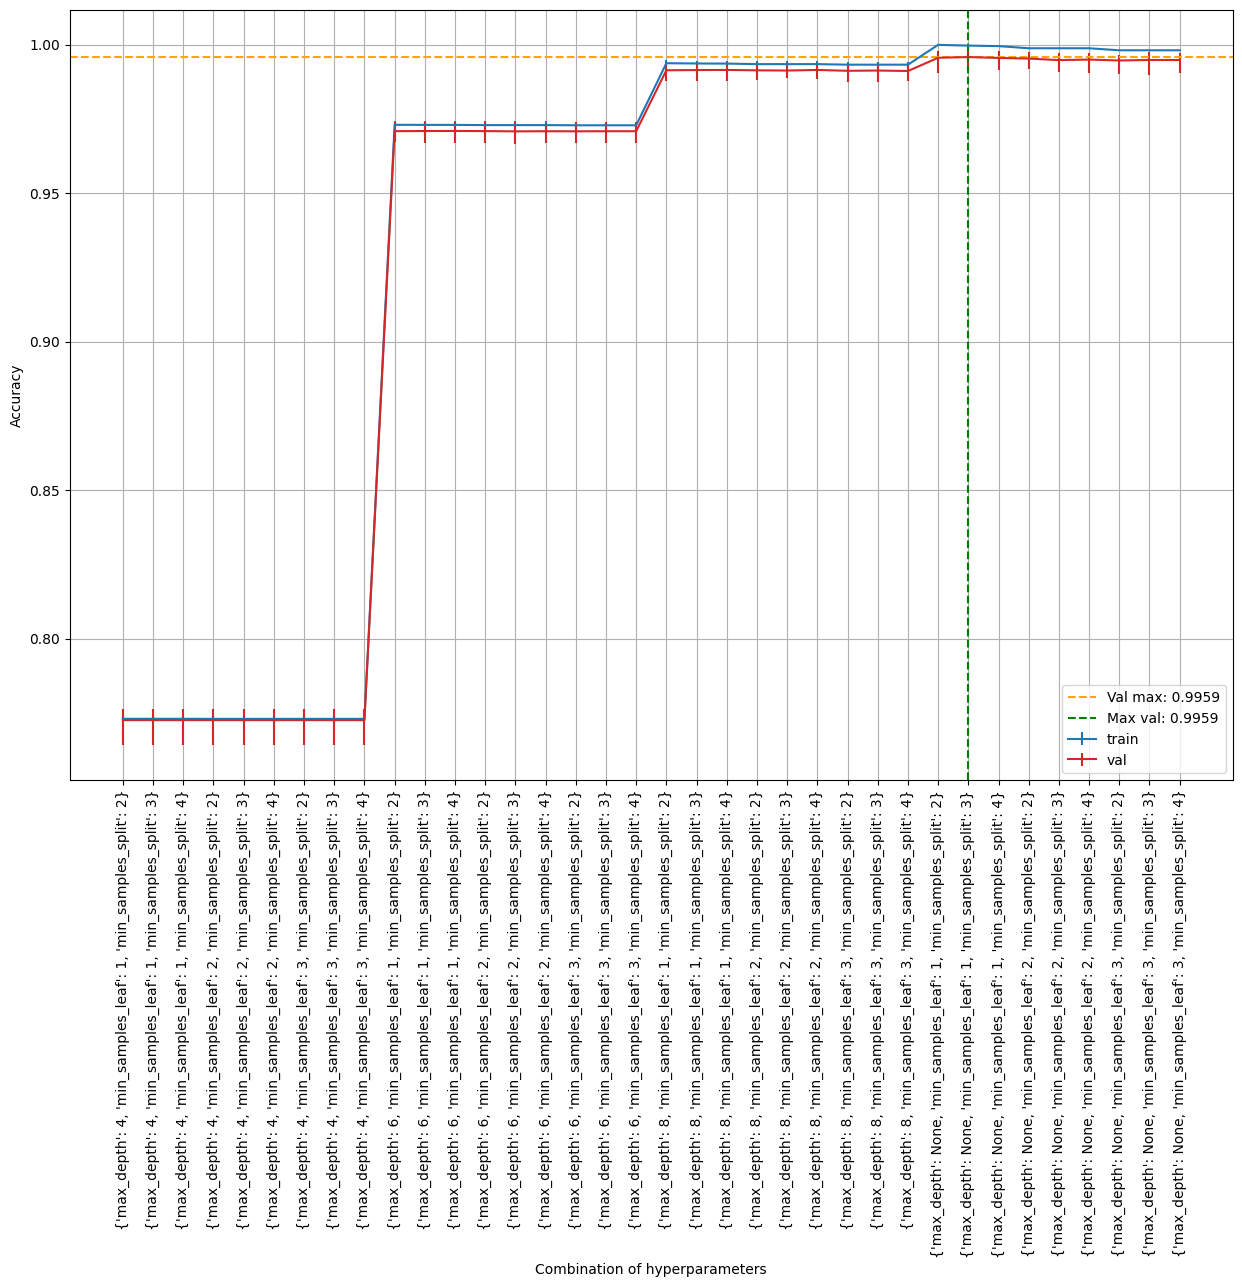

In [12]:
cv_results = grid_search.cv_results_
# print(cv_results.keys())


train_splits=[]
for k in range(n_splits):
    train_splits.append(cv_results[f'split{k}_train_score'])

val_splits=[]
for k in range(n_splits):
    val_splits.append(cv_results[f'split{k}_test_score'])

params = cv_results['params']
# print(params)
n_combinations = len(params)
acc_train_means = cv_results['mean_train_score']
acc_train_maxs = np.array([np.max([arr[i] for arr in train_splits]) for i in range(n_combinations)])
acc_train_mins = np.array([np.min([arr[i] for arr in train_splits]) for i in range(n_combinations)])
acc_val_means = cv_results['mean_test_score']
acc_val_maxs = np.array([np.max([arr[i] for arr in val_splits]) for i in range(n_combinations)])
acc_val_mins = np.array([np.min([arr[i] for arr in val_splits]) for i in range(n_combinations)])


plt.figure(figsize=(15,10))

plt.errorbar(
    [x for x in range(n_combinations)], # x-location of each error bar
    [mean for mean in acc_train_means], # y-location of each error bar
    # the size of each error bar
    yerr=[
        [mean-min for mean,min in zip(acc_train_means,acc_train_mins)], 
        [maxx-mean for maxx,mean in zip(acc_train_maxs,acc_train_means)]
    ], 
    color='tab:blue', label='train'
)
plt.errorbar(
    [x for x in range(n_combinations)], # x-location of each error bar
    [mean for mean in acc_val_means], # y-location of each error bar
    # the size of each error bar
    yerr=[
        [mean-min for mean,min in zip(acc_val_means,acc_val_mins)], 
        [maxx-mean for maxx,mean in zip(acc_val_maxs,acc_val_means)]
    ], 
    color='tab:red', label='val'
)

val_max = max(acc_val_means)
plt.axhline(y=val_max, color='orange', linestyle='--', label=f'Val max: {val_max:.4f}')
plt.axvline(x=np.where(acc_val_means==val_max), color='green', linestyle='--', label=f'Max val: {val_max:.4f}')

plt.grid()
plt.xlabel('Combination of hyperparameters')
plt.ylabel('Accuracy')
plt.xticks([i for i in range(n_combinations)],[x for x in params],rotation=90)
plt.legend()
plt.show()

Accuracy of dt on train: 99.95018524860674%
Accuracy of dt on test: 99.46554586965546%
              precision    recall  f1-score   support

      benign       0.99      1.00      1.00      1697
    ddos_dns       1.00      0.99      0.99      1611
   ddos_ldap       1.00      1.00      1.00      1779
  ddos_mssql       1.00      1.00      1.00      1773
ddos_netbios       1.00      1.00      1.00      1749
    ddos_ntp       0.96      0.96      0.96       296
   ddos_snmp       1.00      1.00      1.00      1795
   ddos_ssdp       1.00      1.00      1.00      1791
    ddos_syn       0.99      0.99      0.99      1644
   ddos_tftp       0.99      0.99      0.99      1578
    ddos_udp       1.00      0.99      1.00      1763
ddos_udp_lag       1.00      1.00      1.00      1796

    accuracy                           0.99     19272
   macro avg       0.99      0.99      0.99     19272
weighted avg       0.99      0.99      0.99     19272



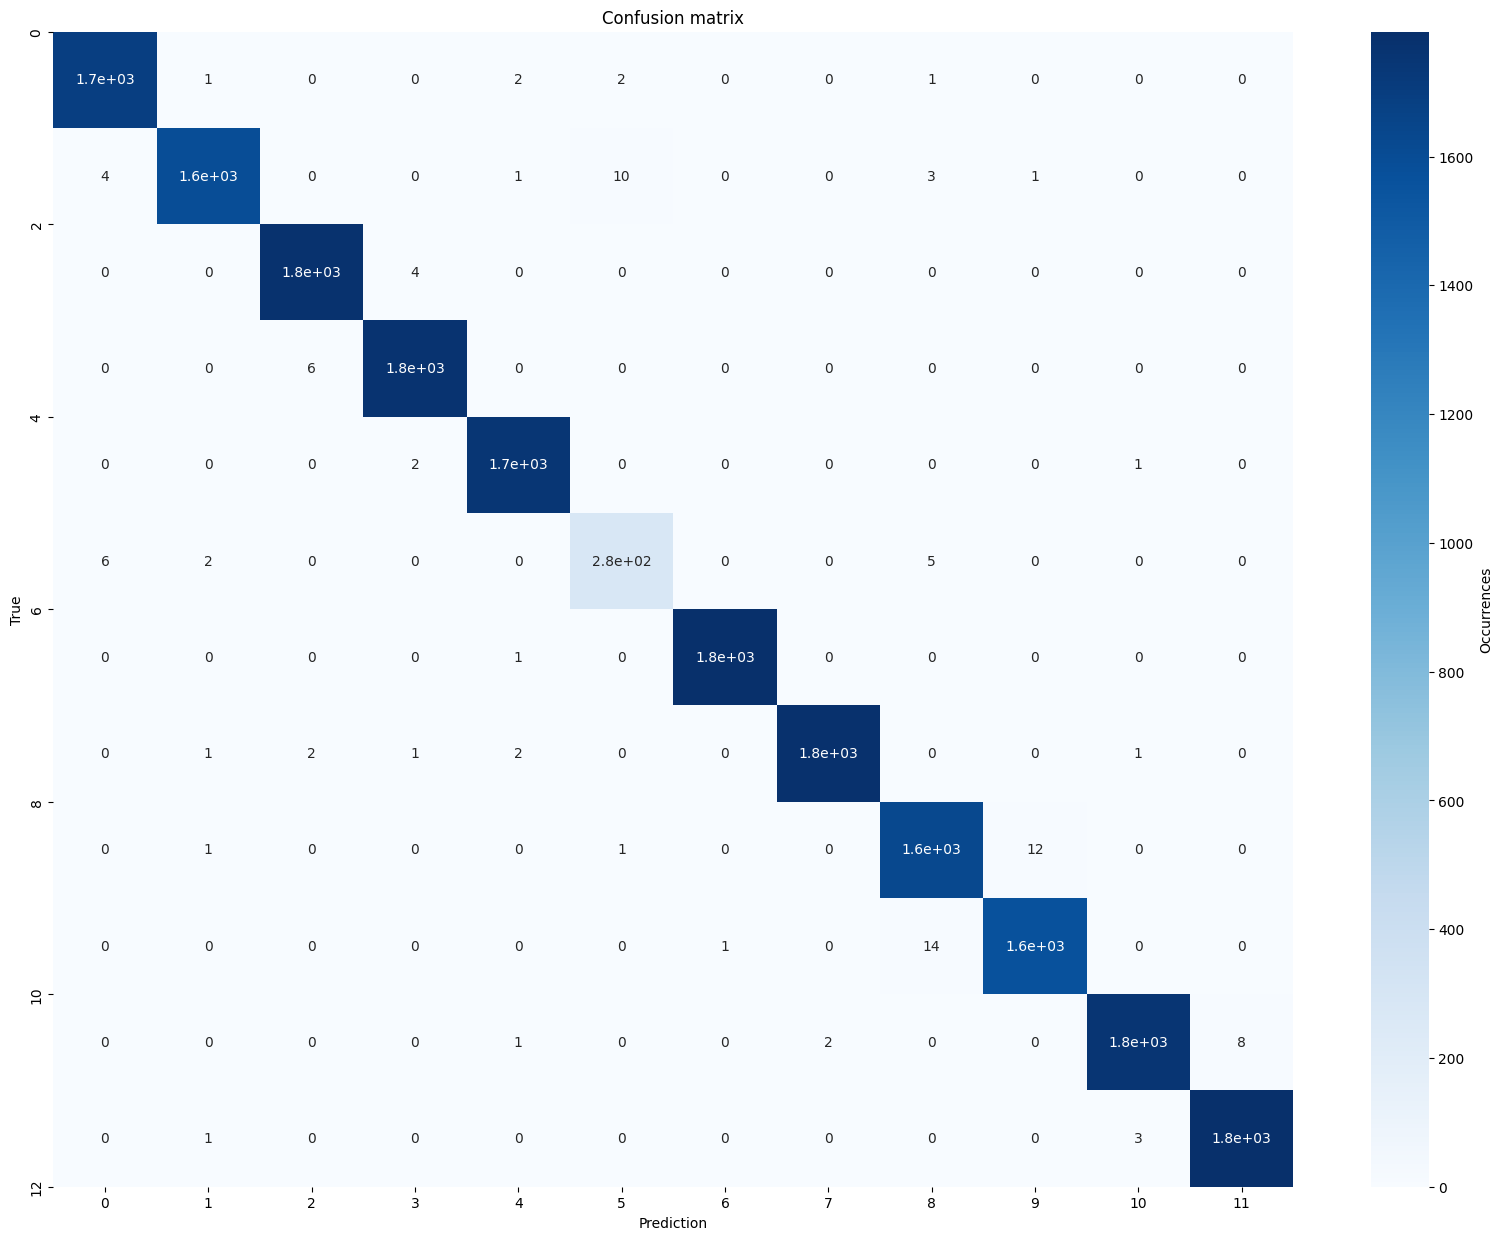

In [13]:
dt_clf = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1,min_samples_split=4,random_state=10)
dt_clf.fit(X_train, y_train)

y_dt_pred_train = dt_clf.predict(X_train)
accuracy = accuracy_score(y_train, y_dt_pred_train)
print(f'Accuracy of dt on train: {accuracy*100}%')

y_dt_pred_test = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_dt_pred_test)
print(f'Accuracy of dt on test: {accuracy*100}%')

print(classification_report(y_test, y_dt_pred_test))
confusion_test = confusion_matrix(y_test, y_dt_pred_test)
# visualize the confusion matrix
plt.figure(figsize=(20,15))
sns.heatmap(confusion_test, cmap='Blues', annot=True, cbar_kws={'label':'Occurrences'})
plt.xlabel('Prediction')
plt.ylabel('True')
plt.yscale('linear')
plt.title('Confusion matrix')
plt.show()

### KNN
Gridsearch with k-fold cross-validation for ``n_neighbors``, ``weights`` and ``algorithm`` parameters

In [14]:
# KNN
param_grid = {
'n_neighbors' : [3,5,8],
'weights':['uniform','distance'],
'algorithm':['ball_tree','kd_tree','brute'],
# 'p':[1,2]
}

dt_clf = KNeighborsClassifier()
n_splits=5
grid_search = GridSearchCV(dt_clf,param_grid,cv=n_splits,scoring='accuracy',return_train_score=True,verbose=True,n_jobs=8)
grid_search.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=8,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 8],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy', verbose=True)

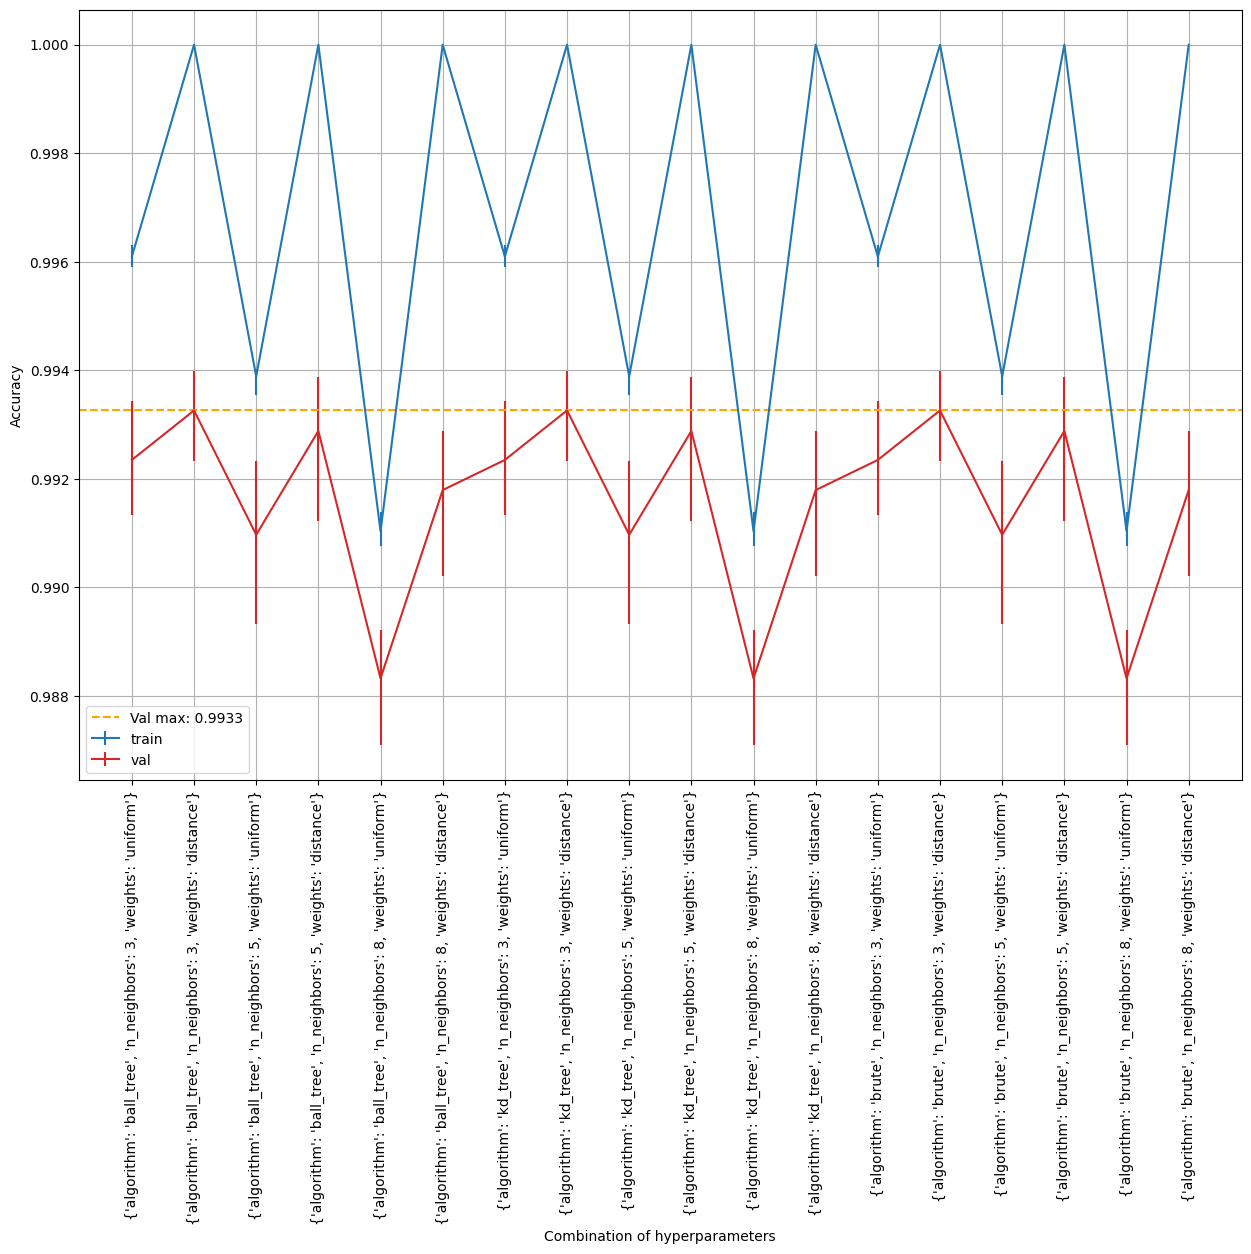

In [15]:
cv_results = grid_search.cv_results_
# print(cv_results.keys())


train_splits=[]
for k in range(n_splits):
    train_splits.append(cv_results[f'split{k}_train_score'])

val_splits=[]
for k in range(n_splits):
    val_splits.append(cv_results[f'split{k}_test_score'])

params = cv_results['params']
# print(params)
n_combinations = len(params)
acc_train_means = cv_results['mean_train_score']
acc_train_maxs = np.array([np.max([arr[i] for arr in train_splits]) for i in range(n_combinations)])
acc_train_mins = np.array([np.min([arr[i] for arr in train_splits]) for i in range(n_combinations)])
acc_val_means = cv_results['mean_test_score']
acc_val_maxs = np.array([np.max([arr[i] for arr in val_splits]) for i in range(n_combinations)])
acc_val_mins = np.array([np.min([arr[i] for arr in val_splits]) for i in range(n_combinations)])


plt.figure(figsize=(15,10))

plt.errorbar(
    [x for x in range(n_combinations)], # x-location of each error bar
    [mean for mean in acc_train_means], # y-location of each error bar
    # the size of each error bar
    yerr=[
        [mean-min for mean,min in zip(acc_train_means,acc_train_mins)], 
        [maxx-mean for maxx,mean in zip(acc_train_maxs,acc_train_means)]
    ], 
    color='tab:blue', label='train'
)
plt.errorbar(
    [x for x in range(n_combinations)], # x-location of each error bar
    [mean for mean in acc_val_means], # y-location of each error bar
    # the size of each error bar
    yerr=[
        [mean-min for mean,min in zip(acc_val_means,acc_val_mins)], 
        [maxx-mean for maxx,mean in zip(acc_val_maxs,acc_val_means)]
    ], 
    color='tab:red', label='val'
)

val_max = max(acc_val_means)
plt.axhline(y=val_max, color='orange', linestyle='--', label=f'Val max: {val_max:.4f}')
# plt.axvline(x=np.where(acc_val_means==val_max), color='green', linestyle='--', label=f'Max val: {val_max:.4f}')

plt.grid()
plt.xlabel('Combination of hyperparameters')
plt.ylabel('Accuracy')
plt.xticks([i for i in range(n_combinations)],[x for x in params],rotation=90)
plt.legend()
plt.show()

Accuracy of dt on train: 100.0%
Accuracy of dt on test: 99.20610211706102%
              precision    recall  f1-score   support

      benign       1.00      1.00      1.00      1697
    ddos_dns       0.99      0.98      0.98      1611
   ddos_ldap       0.98      0.99      0.98      1779
  ddos_mssql       0.98      0.98      0.98      1773
ddos_netbios       0.99      1.00      0.99      1749
    ddos_ntp       0.94      0.98      0.96       296
   ddos_snmp       1.00      1.00      1.00      1795
   ddos_ssdp       1.00      0.99      1.00      1791
    ddos_syn       0.99      0.99      0.99      1644
   ddos_tftp       0.99      0.99      0.99      1578
    ddos_udp       1.00      1.00      1.00      1763
ddos_udp_lag       1.00      1.00      1.00      1796

    accuracy                           0.99     19272
   macro avg       0.99      0.99      0.99     19272
weighted avg       0.99      0.99      0.99     19272



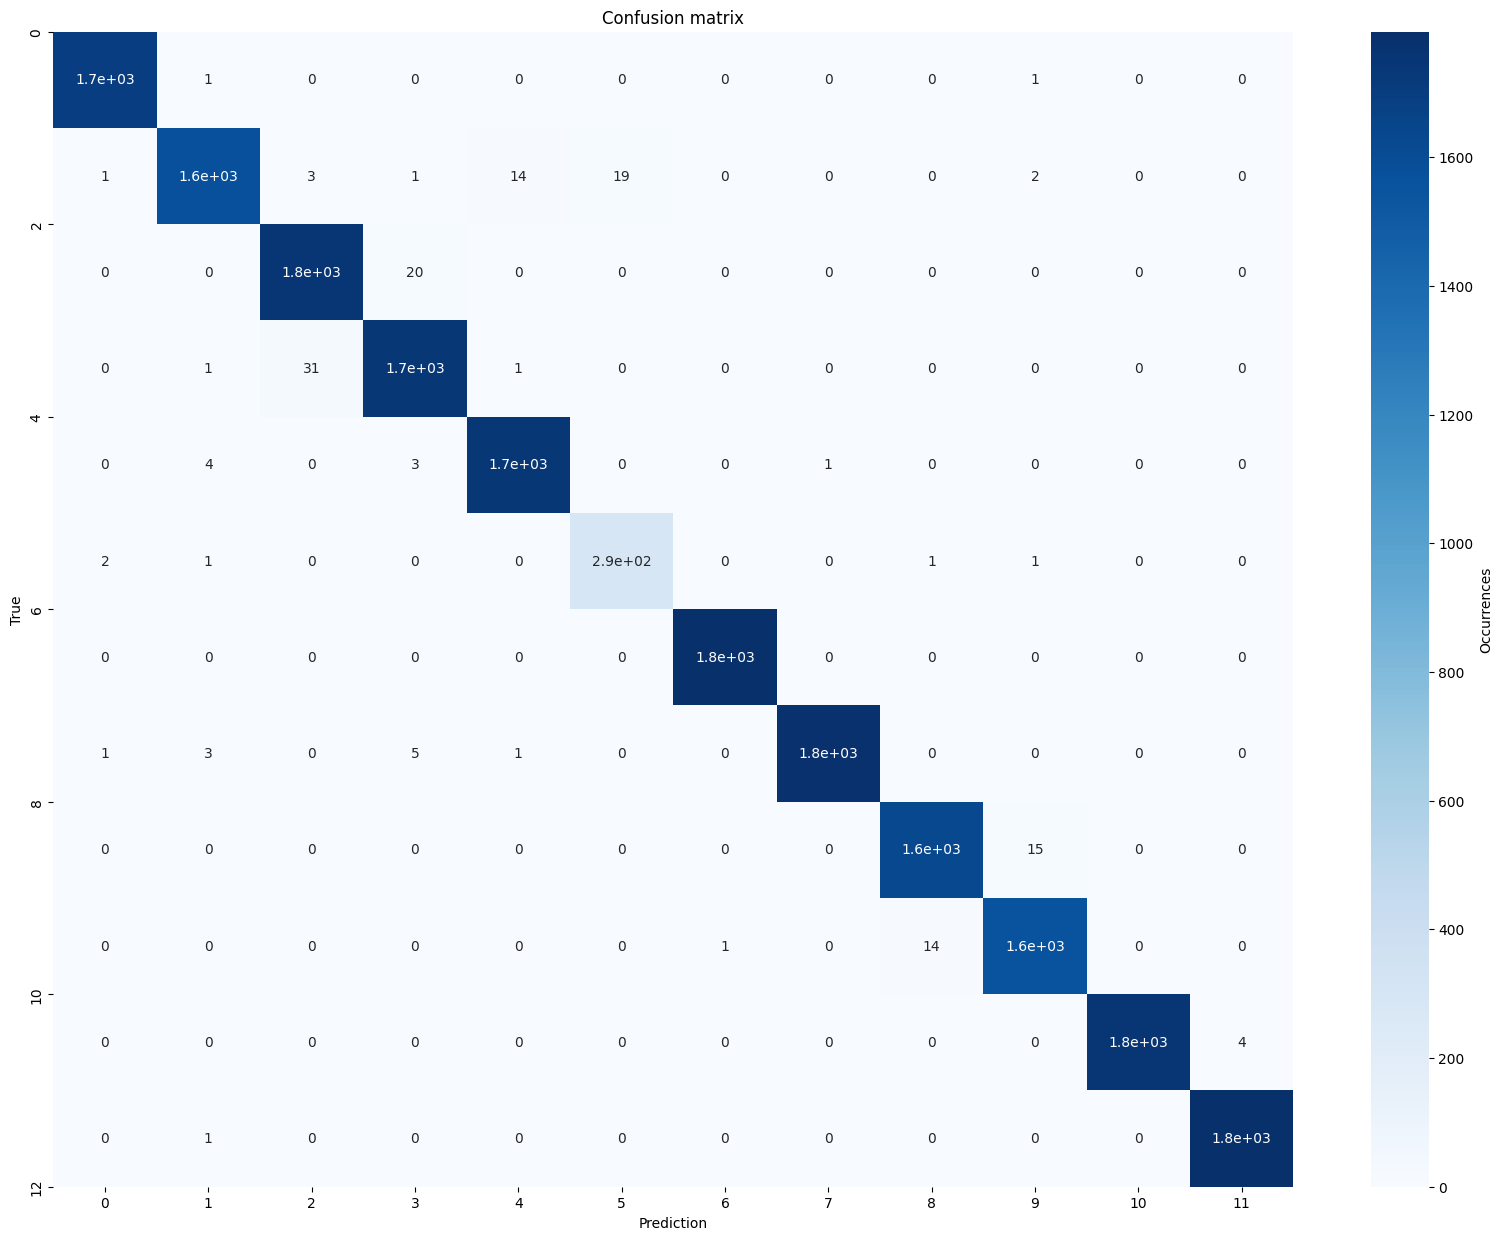

In [16]:
knn_clf = KNeighborsClassifier(n_neighbors=3,weights='distance')
knn_clf.fit(X_train, y_train)

y_dt_pred_train = knn_clf.predict(X_train)
accuracy = accuracy_score(y_train, y_dt_pred_train)
print(f'Accuracy of dt on train: {accuracy*100}%')

y_dt_pred_test = knn_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_dt_pred_test)
print(f'Accuracy of dt on test: {accuracy*100}%')

print(classification_report(y_test, y_dt_pred_test))
confusion_test = confusion_matrix(y_test, y_dt_pred_test)
# visualize the confusion matrix
plt.figure(figsize=(20,15))
sns.heatmap(confusion_test, cmap='Blues', annot=True, cbar_kws={'label':'Occurrences'})
plt.xlabel('Prediction')
plt.ylabel('True')
plt.yscale('linear')
plt.title('Confusion matrix')
plt.show()

### Random Forest
Gridsearch with k-fold cross-validation for ``criterion``, ``max_depth``, ``min_samples_split`` and ``n_estimators`` parameters

In [17]:
#RandomForest
param_grid = {
'criterion': ['gini','entropy'],
'max_depth' : [4,6,8,None],
'min_samples_split': [2,3,4],
'n_estimators':[50,100,150,200]
}

dt_clf = RandomForestClassifier(n_jobs=8)
n_splits=5
grid_search = GridSearchCV(dt_clf,param_grid,cv=n_splits,scoring='accuracy',return_train_score=True,verbose=True,n_jobs=8)
grid_search.fit(X,y)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=8), n_jobs=8,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, None],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 150, 200]},
             return_train_score=True, scoring='accuracy', verbose=True)

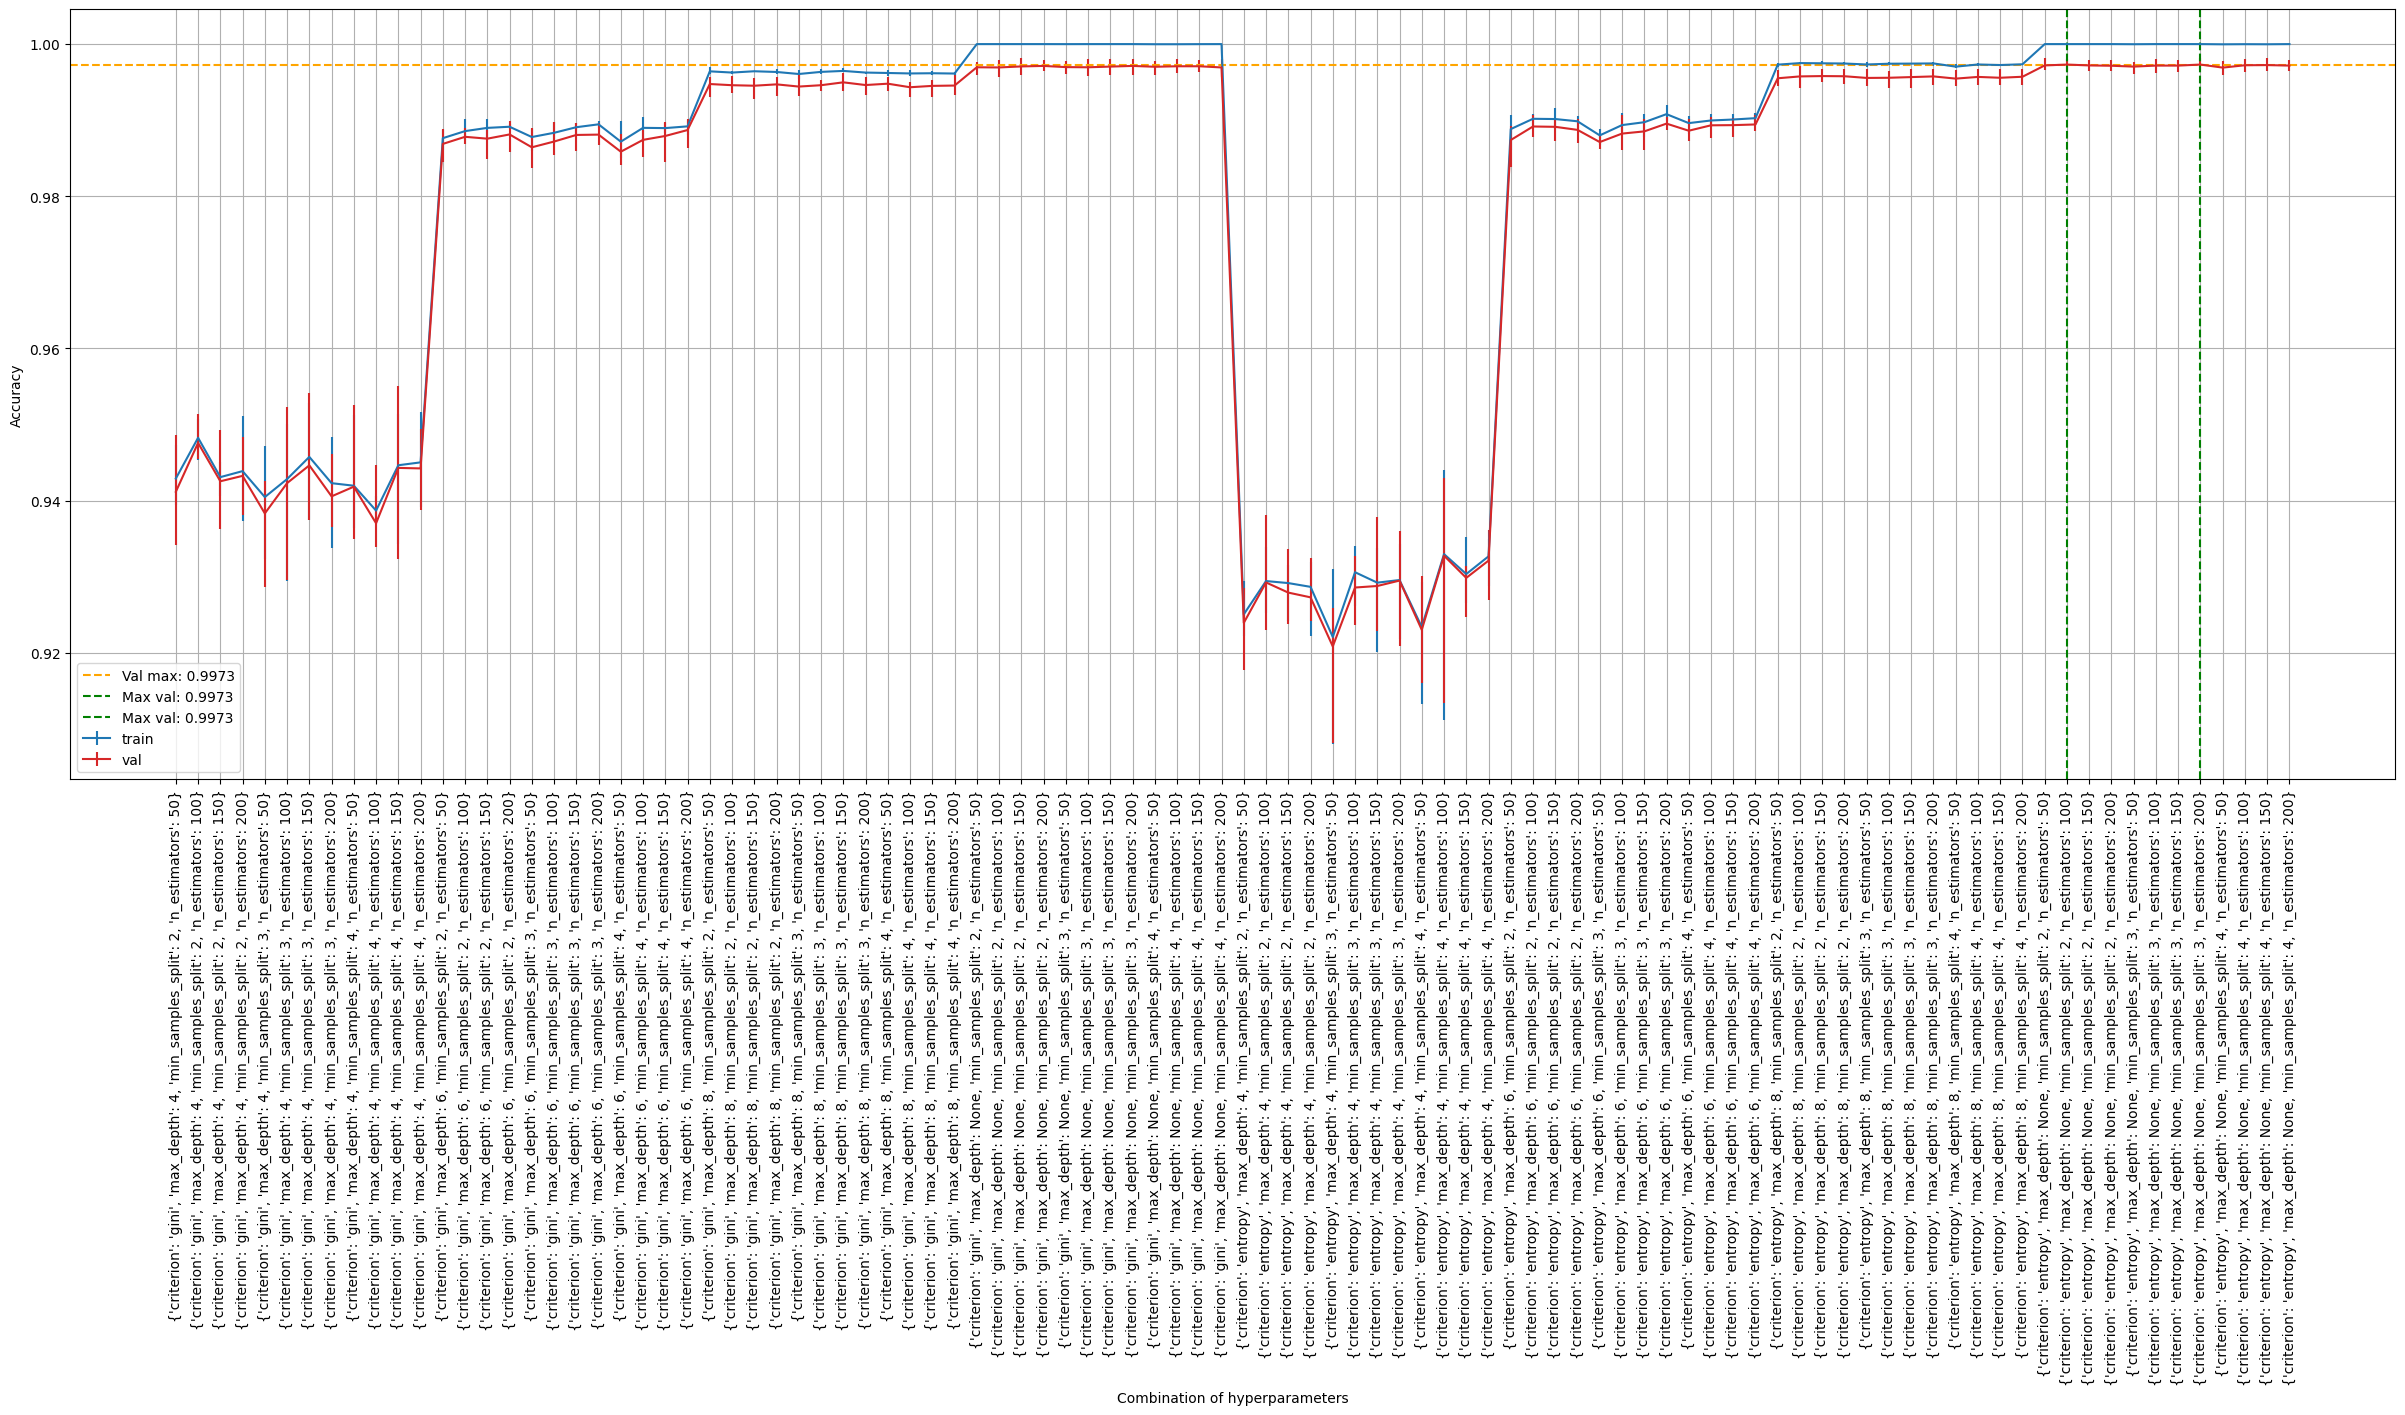

In [25]:
cv_results = grid_search.cv_results_
# print(cv_results.keys())


train_splits=[]
for k in range(n_splits):
    train_splits.append(cv_results[f'split{k}_train_score'])

val_splits=[]
for k in range(n_splits):
    val_splits.append(cv_results[f'split{k}_test_score'])

params = cv_results['params']
# print(params)
n_combinations = len(params)
acc_train_means = cv_results['mean_train_score']
acc_train_maxs = np.array([np.max([arr[i] for arr in train_splits]) for i in range(n_combinations)])
acc_train_mins = np.array([np.min([arr[i] for arr in train_splits]) for i in range(n_combinations)])
acc_val_means = cv_results['mean_test_score']
acc_val_maxs = np.array([np.max([arr[i] for arr in val_splits]) for i in range(n_combinations)])
acc_val_mins = np.array([np.min([arr[i] for arr in val_splits]) for i in range(n_combinations)])


plt.figure(figsize=(30,10))

plt.errorbar(
    [x for x in range(n_combinations)], # x-location of each error bar
    [mean for mean in acc_train_means], # y-location of each error bar
    # the size of each error bar
    yerr=[
        [mean-min for mean,min in zip(acc_train_means,acc_train_mins)], 
        [maxx-mean for maxx,mean in zip(acc_train_maxs,acc_train_means)]
    ], 
    color='tab:blue', label='train'
)
plt.errorbar(
    [x for x in range(n_combinations)], # x-location of each error bar
    [mean for mean in acc_val_means], # y-location of each error bar
    # the size of each error bar
    yerr=[
        [mean-min for mean,min in zip(acc_val_means,acc_val_mins)], 
        [maxx-mean for maxx,mean in zip(acc_val_maxs,acc_val_means)]
    ], 
    color='tab:red', label='val'
)

val_max = max(acc_val_means)
plt.axhline(y=val_max, color='orange', linestyle='--', label=f'Val max: {val_max:.4f}')

x=np.where(acc_val_means==val_max)
for i in x[0]:
    plt.axvline(x=i, color='green', linestyle='--', label=f'Max val: {val_max:.4f}')

plt.grid()
plt.xlabel('Combination of hyperparameters')
plt.ylabel('Accuracy')
plt.xticks([i for i in range(n_combinations)],[x for x in params],rotation=90)
plt.legend()
plt.show()

Accuracy of dt on train: 100.0%
Accuracy of dt on test: 99.69385637193857%
              precision    recall  f1-score   support

      benign       0.99      1.00      1.00      1697
    ddos_dns       1.00      0.99      0.99      1611
   ddos_ldap       1.00      1.00      1.00      1779
  ddos_mssql       1.00      1.00      1.00      1773
ddos_netbios       1.00      1.00      1.00      1749
    ddos_ntp       0.97      0.98      0.97       296
   ddos_snmp       1.00      1.00      1.00      1795
   ddos_ssdp       1.00      1.00      1.00      1791
    ddos_syn       0.99      0.99      0.99      1644
   ddos_tftp       0.99      0.99      0.99      1578
    ddos_udp       1.00      1.00      1.00      1763
ddos_udp_lag       1.00      1.00      1.00      1796

    accuracy                           1.00     19272
   macro avg       0.99      1.00      1.00     19272
weighted avg       1.00      1.00      1.00     19272



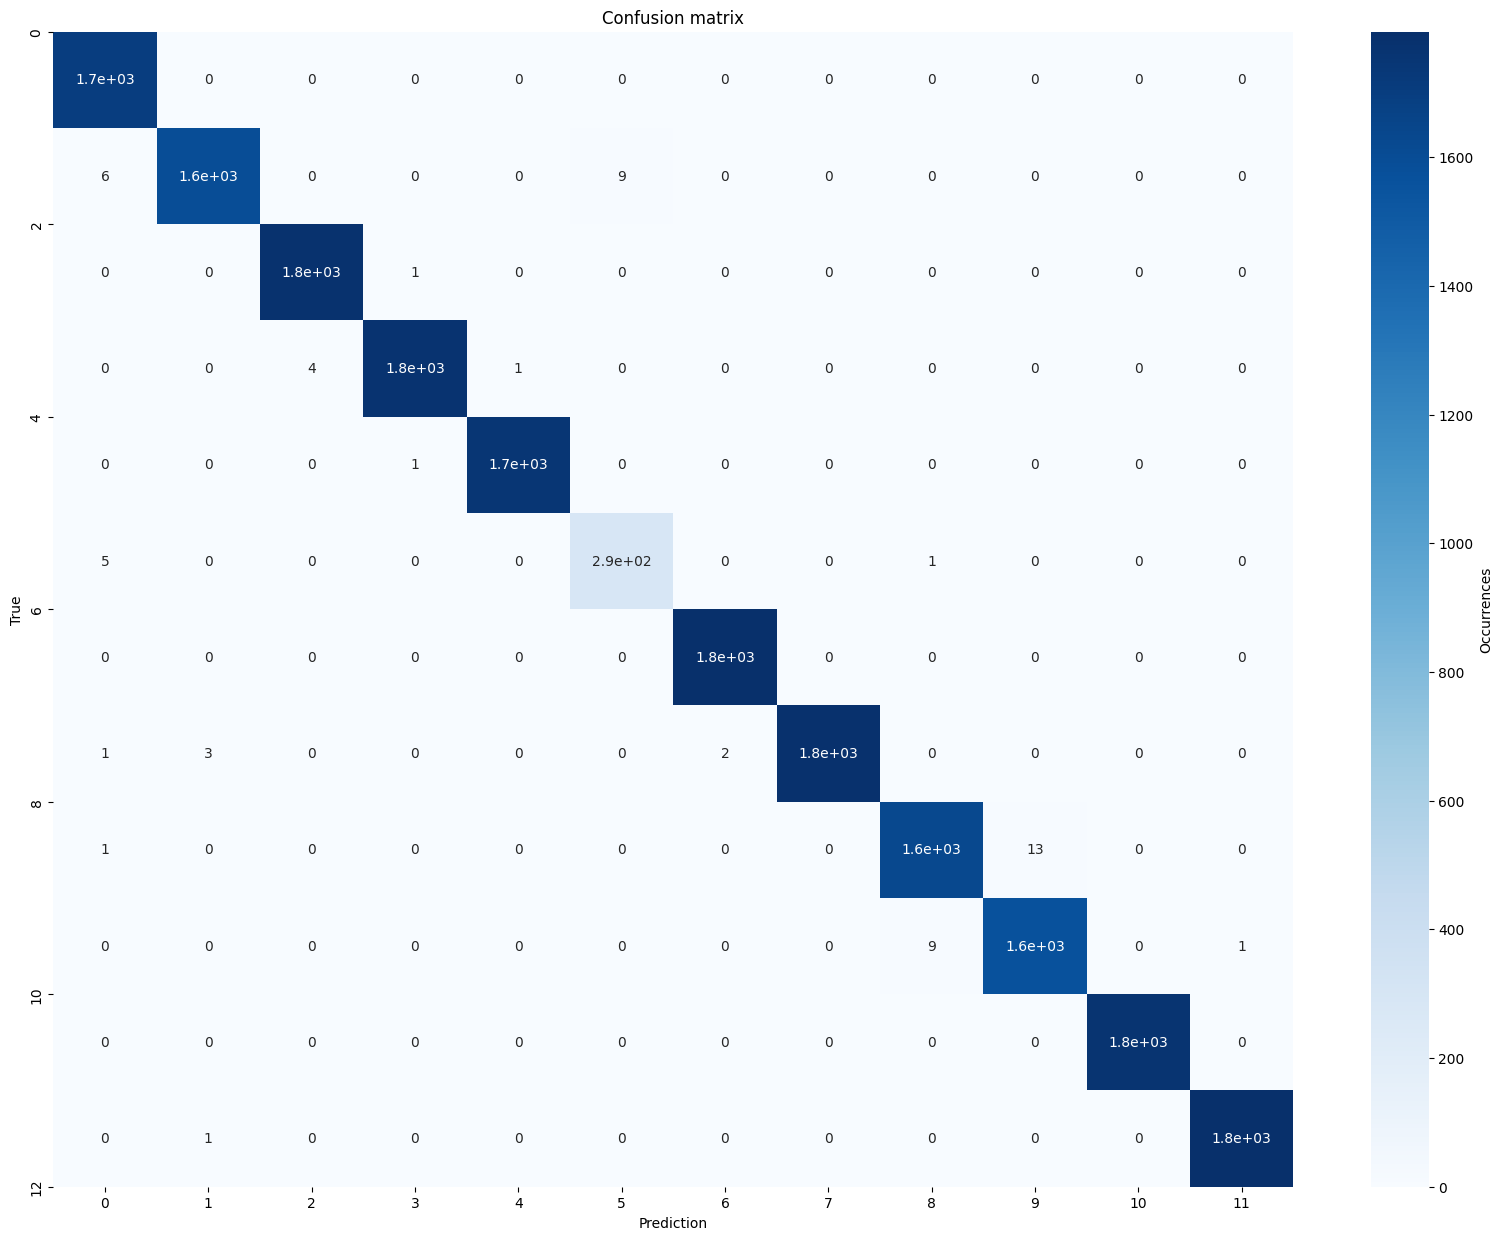

In [26]:
rf_clf = RandomForestClassifier(max_depth=None,criterion='entropy',min_samples_split=3,n_estimators=200,n_jobs=8) 
rf_clf.fit(X_train, y_train)

y_dt_pred_train = rf_clf.predict(X_train)
accuracy = accuracy_score(y_train, y_dt_pred_train)
print(f'Accuracy of dt on train: {accuracy*100}%')

y_dt_pred_test = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_dt_pred_test)
print(f'Accuracy of dt on test: {accuracy*100}%')

print(classification_report(y_test, y_dt_pred_test))
confusion_test = confusion_matrix(y_test, y_dt_pred_test)
# visualize the confusion matrix
plt.figure(figsize=(20,15))
sns.heatmap(confusion_test, cmap='Blues', annot=True, cbar_kws={'label':'Occurrences'})
plt.xlabel('Prediction')
plt.ylabel('True')
plt.yscale('linear')
plt.title('Confusion matrix')
plt.show()